# Guia 4

## Ejercicio 6

La señal que se encuentra en el archivo `necg.txt` corresponde al registro de la actividad eléctrica del corazón de un paciente. Esta señal se ha digitalizado a razón de 360 muestras por segundo. Se sabe que el registro ha sido contaminado con un ruido en la banda de 40 a 180 Hz y se necesita eliminarlo para poder realizar un diagnóstico adecuado. Utilice la TDF para filtrar la señal.

### Solución

Una forma de (rudimentaria) de filtrar la señal de 40 a 180 Hz con la DFT consiste en:

- Transformar la señal original
- Eliminar las señales de 40 a 180Hz y de -180 a -40 Hz (recordar que el espectro es simétrico)
- Reconstruir la señal a partir del resultado

/tmp/ipykernel_18670/3956835109.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n] += X[k]*np.exp(aux2*k)


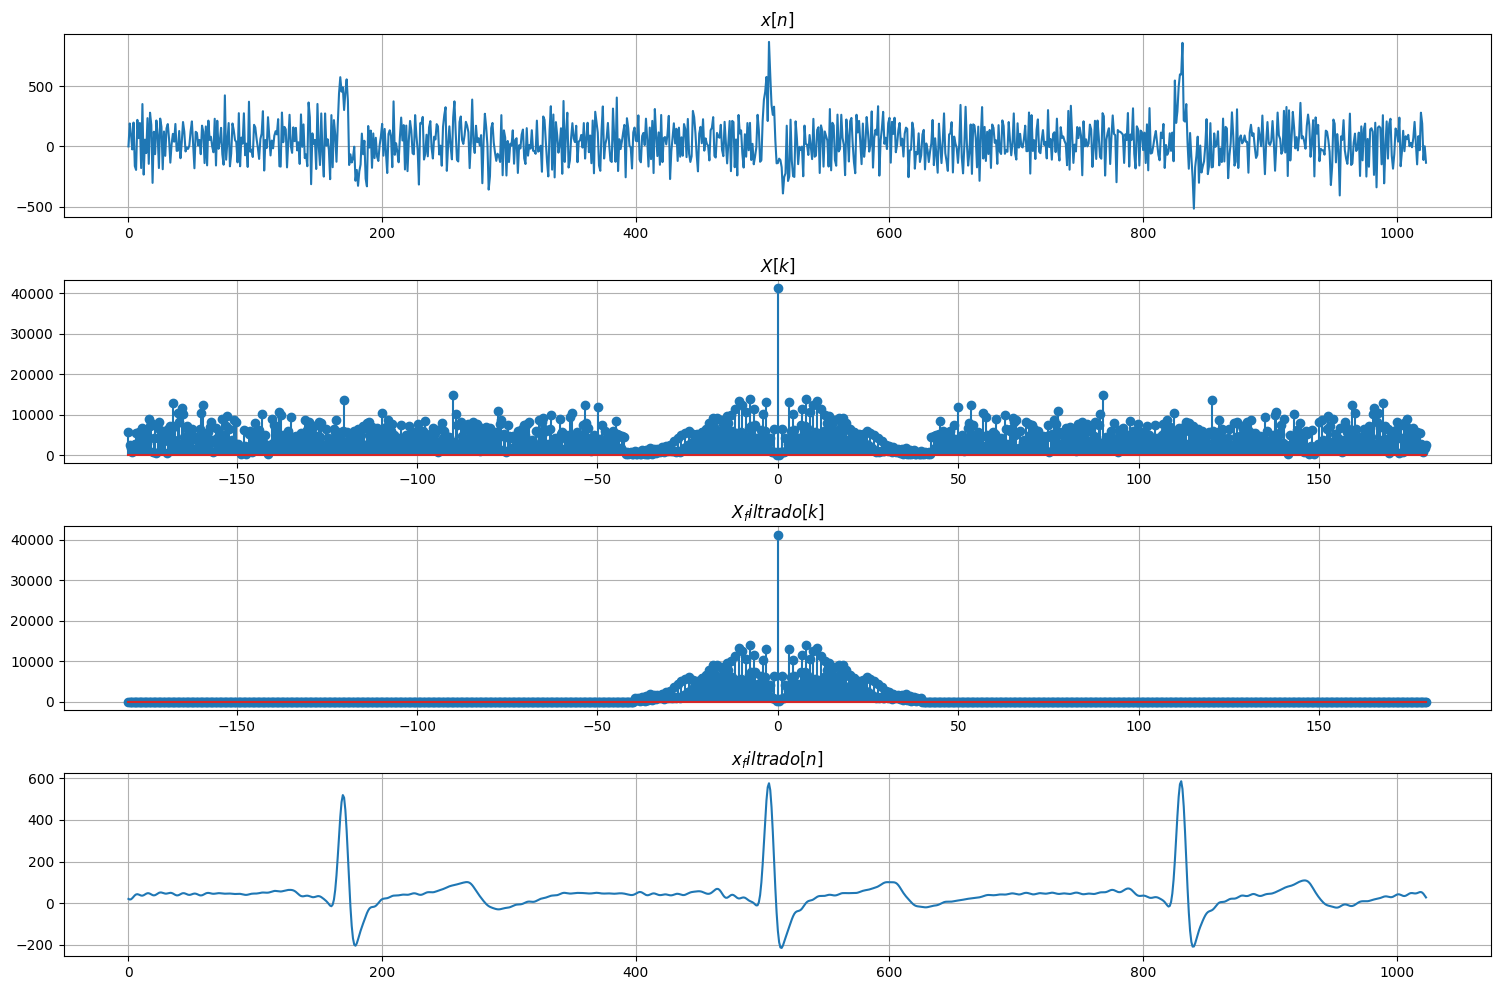

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def fourier(x):
    N = len(x)
    coefs = np.zeros(N, dtype=complex)  # vector de coeficientes
    aux1 = -2.0*np.pi/N                 # precalculamos valores que se repiten
    for k in range(N):
        aux2 = aux1*k                   # precalculamos (otros) valores que se repiten
        for n in range(N):
            coefs[k] += x[n]*np.exp(1j*aux2*n)
    return coefs

def reconstruir(X):
    N = len(X)
    x = np.zeros(N)
    aux1 = 1j*2*np.pi/N
    for n in range(N):
        aux2 = aux1*n
        for k in range(N):
            x[n] += X[k]*np.exp(aux2*k)
    return np.divide(x,N)

# Parametros
fm = 360

# Leer archivo
cora = np.loadtxt('necg.txt')

# Calcular DFT
N = len(cora)
f = np.linspace(0,fm,N, endpoint=False)     # dominio de frecuencias
for k in range(int(N/2),N):
    f[k] = f[k]-fm
coraDFT = fourier(cora)

# Limpiar DFT (donde f <= -40 or f >= 40)
coraDFTFiltrado = np.where(
    np.logical_or(np.less_equal(f,-40),np.greater_equal(f,40)), # if f<=-40 or f>=40
    0,                                                          #   X[f] = 0
    coraDFT
)

# Reconstruir
coraFiltrado = reconstruir(coraDFTFiltrado)

# Graficar
fig, ax = plt.subplots(4)
ax[0].set_title('$x[n]$')
ax[1].set_title('$X[k]$')
ax[2].set_title('$X_filtrado[k]$')
ax[3].set_title('$x_filtrado[n]$')
fig.set_figheight(10)
fig.set_figwidth(15)
fig.tight_layout()
for x in ax:
    x.grid()

ax[0].plot(cora)
ax[1].stem(f,np.abs(coraDFT))
ax[2].stem(f,np.abs(coraDFTFiltrado))
ax[3].plot(coraFiltrado)